###Hamiltoniano

El sistema se modela con el modelo de Ising de campo aleatorio. El Hamiltoniano del sistema incorpora, además de la interacción de los espines vecinos, un término de la interacción de cada espín con el campo externo (que va a cambiar en el tiempo), y uno con un campo local aleatorio. 

$$ H = - \sum_{\langle i, j \rangle} J s_i s_j - \sum_{i}(H(t) + h_i)s_i $$

El campo aleatorio se escoge dentro de una distribución Gaussiana, con desviación estándar $R$:

$$ P(h) =  \frac{1}{\sqrt{2 \pi} R} e^{-h^2/2R^2} $$

Podemos reescribir al Hamiltoniano de la siguiente forma:

$$ H = - \sum_i \, \left[ \sum_{\langle j_i \rangle} J s_i s_j + (H(t) + h_i)s_i\right] $$

donde usamos la notación $\langle j_i \rangle$ para referirnos a los índices de los espines que son primeros vecinos de $s_i$.

Con la suma explícita corriendo sobre el índice $i$, es claro ahora que para un espín fijo $s_i$, la contribución a la energía total del sistema es:

$$ \begin{array}{c c l}
    H_i & = & - s_i \, \left[J \sum_{\langle j_i \rangle} s_j + H(t) + h_i \right] \\
    & = & - s_i T_i 
    \end{array}$$

###Evolución

Tomamos la temperatura igual a cero, y hacemos que todos los espines apunten hacia abajo. El campo externo se va a incrementar de $-\infty$ a $+\infty$, adiabáticamente (de manera infinitamente lenta), y posteriormente se va a disminuir en sentido contrario.

Originalmente todos los espines apuntan hacia abajo. El campo $H(t)$ es negativo y más grande en valor absoluto que $h_i$, (ésto es $H(t) + h_i < 0$) así que $H_i <0, \, \, \forall i$. 

Empezamos a incrementar el campo externo y buscamos cuándo es más favorable energéticamente que el espín $s_i$ se voltee. Ésto ocurre cuando $T_i$ se vuelve positivo, y por lo tanto $H_i$ se vuelve positivo. Entonces, $s_i$ cambia de signo y hace que $H_i$ sea de nuevo negativo. 

Cuando hacemos el camino inverso, disminuyendo el campo, $s_i$ apunta en un principio hacia arriba y ocurre lo contrario. $T_i$ originalmente es positivo, y cuando se vuelve negativo $s_i$ se voltea para hacer que $H_i$ se mantenga negativo.

###Avalanchas

El modelo que estamos utilizando da lugar de manera natural a avalanchas en las que, después de voltear un espín, a los vecinos les puede ser energeticamente favorable voltearse, sólo debido a la interacción entre espines, y con el campo externo fijo. 

En el caso en que los espines apuntan para abajo, y el campo magnético externo incrementa, en la implementación del modelo tenemos que buscar al primer espín que se voltea al incrementar $H(t)$. Éste espín tiene el máximo valor de $\sum s_j + h_i$. Llevamos el campo exactamente al valor necesario para voltearlo, $H(t) = -(J\sum s_j + h_i)$, y revisamos si hay espines que se pueden voltear por la interacción entre vecinos, esto es, si se produce una avalancha. Si no se produce, o si se produce y se acaban los vecinos que se voltean, recomenzamos y buscamos un nuevo valor máximo de $J\sum s_j + h_i$

Podemos resumir el algoritmo, para propagar una avalancha:
1. Buscamos el espín que inicia la avalancha, y que tiene el máximo valor de $J\sum s_j + h_i$.
2. Incrementamos $H(t)$ a menos el valor de este campo interno, y volteamos el espín $s_i$
3. Buscamos, entre todos los vecinos que no han sido volteados, los que tienen $J\sum s_j + h_i + H(t) = T_i > 0$, y los volteamos. Guardamos sus vecinos que no han sido volteados, y volvemos a empezar a buscar entre estos nuevos espines, hasta que ya no haya espines por voltear.
4. Repetimos desde el paso 1.

# Modelo

In [10]:
using PyPlot
using Interact

In [3]:
using Histeresis

#### Todo el recorrido completo, $H$ aumenta hasta voltear todos los espines, y luego disminuye hasta voltear todos los espines

In [4]:
L = 50
R = 4
N = L^2
espin = -1 # Empezamos con los espines apuntando hacia abajo, e incrementamos el campo H
m = edo_inicial(L,R,espin)

H_set = 15
@time mag1, hs1 = magnetizacion_aumenta_H!(m,H_set,espin) ;

elapsed time: 0.6742576 seconds (32567508 bytes allocated)


In [5]:
# Espines apuntando hacia abajo, y disminuimos el campo H
@time mag2, hs2 = magnetizacion_aumenta_H!(m,-H_set,-espin) ;

elapsed time: 0.443525504 seconds (26710424 bytes allocated, 17.90% gc time)


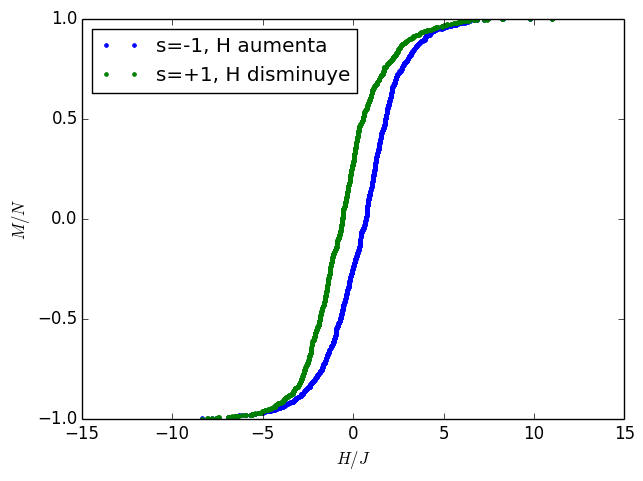

In [9]:
figure(figsize=(7,5))
xlabel(L"H/J") #J=1
ylabel(L"M/N")
xlim(-H_set,H_set)
ylim(-1,1)

plot(hs1,mag1/N, ".", label="s=-1, H aumenta")
plot(hs2,mag2/N, ".", label="s=+1, H disminuye")
legend(loc="upper left");

#### Con Sliders, sólo la subida o sólo la bajada

Slider{Int64}([Input{Int64}] 0,"H_set",0,-15:15)

Options{:ToggleButtons,Int64}([Input{Int64}] -1,"espin",-1,"-1",["-1"=>-1,"+1"=>1])

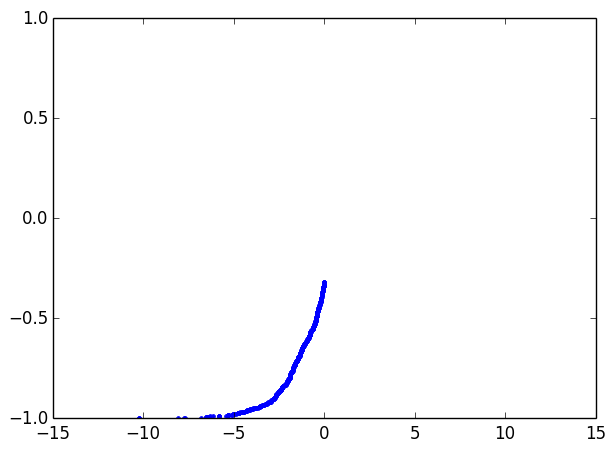

In [12]:
L = 50
R = 4
N = L^2
H_max = 15

fig = figure(figsize=(7,5))
xlabel(L"H/J") #J=1
ylabel(L"M/N")


@manipulate for H_set=-H_max:H_max, espin=[symbol("-1") => -1, symbol("+1") => 1]
    withfig(fig) do
        xlim(-H_max,H_max)
        ylim(-1,1)
        
        m = edo_inicial(L,R,espin)
        mag, hs = magnetizacion_aumenta_H!(m,H_set,espin)
        plot(hs,mag/N, ".")
    end
end